In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('../../src/')

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import random

from experiment.data import Environment
from torchvision.datasets import ImageFolder
from PIL import Image
from models.selfsupervised.make_surrogate_classes import mean_gradient

from skimage.filters import threshold_otsu, threshold_local

In [9]:
env = Environment()

In [17]:
img_paths = list(env.dataset('jigsaw_tiles').glob('*.jpg'))

In [22]:
imgs = []
for p in img_paths:
    img = Image.open(p)
    img.load()
    imgs.append(img)

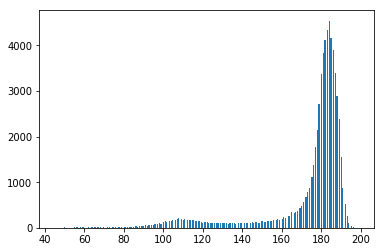

In [37]:
image = np.array(imgs[10].convert('L'))
thres = threshold_otsu(image)
ax = plt.hist(image.ravel(), bins=256)


In [44]:
grads = []
for img in imgs:
    image = np.array(img.convert('L'))
    grads.append(mean_gradient(image))

In [49]:
grads = np.array(grads)

(array([4.640e+02, 9.800e+02, 1.193e+03, 7.590e+02, 5.500e+02, 3.840e+02,
        3.210e+02, 3.100e+02, 3.130e+02, 3.310e+02, 3.360e+02, 3.910e+02,
        4.300e+02, 3.680e+02, 3.070e+02, 2.230e+02, 1.770e+02, 1.260e+02,
        6.600e+01, 4.600e+01, 4.800e+01, 2.800e+01, 2.400e+01, 1.700e+01,
        6.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        1.300e+01, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  0.        ,   2.72708553,   5.45417106,   8.18125659,
         10.90834212,  13.63542765,  16.36251318,  19.0895987 ,
         21.81668423,  24.54376976,  27.27085529,  29.99794082,
         32.72502635,  35.45211188,  38.17919741,  40.90628294,
         43.63336847,  46.360454  ,  49.08753953,  51.81462505,
         54.54171058,  57.26879611,  59.99588164,  62.72296717,
         65.4500527 ,  68.17713823,  70.90422376,  73.63130929,
         76.35839482,  79.08548035,  81.81256588,  84.

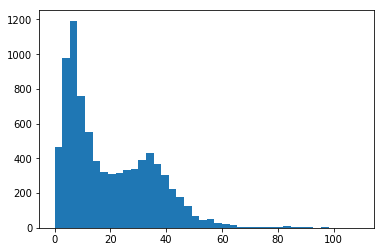

In [50]:
plt.hist(grads, bins=40)

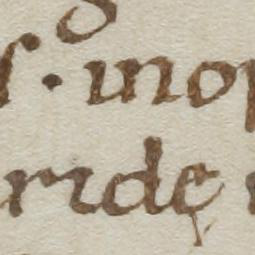

In [79]:
imgs[random.choice(np.where(grads > 30)[0])]